In [1]:
import polars as pl
from pathlib import Path

data_dir = Path("../data")

transactions = pl.scan_parquet(data_dir / "transactions_train_3.parquet")
lines = pl.scan_parquet(data_dir / "transaction_lines_train_3.parquet")
products = pl.scan_csv(data_dir / "products.csv")

df = pl.scan_parquet(data_dir / "transactions_joined.parquet")

In [13]:
%pwd

'/home/david/Hagen/projektpraktikum/projektpraktikum-datascience/analyze'

In [16]:
data_tr_dir = Path("../data-transformation")
tf = pl.scan_parquet(data_tr_dir / "transformed_label_and_damage.parquet")

In [25]:
a = tf.filter(pl.col("has_missing")).select(pl.len()).collect().to_numpy()
b = tf.filter(pl.col("has_unscanned")).select(pl.len()).collect().to_numpy()
c = tf.filter(pl.col("has_missing") & pl.col("has_unscanned")).select(pl.len()).collect().to_numpy()
print(a, b, c)

[[16]] [[377]] [[16]]


In [19]:
tf.filter(pl.col("has_missing")).collect().to_pandas()

,label,damage,cash_desk,total_amount,n_lines,payment_medium,has_feedback,feedback_categorical,feedback_low,feedback_middle,...,has_frozen_goods,has_alcohol,has_fruits_vegetables,has_missing,mean_time_between_scans,max_time_between_scans,time_to_first_scan,time_from_last_scan_to_end,days_since_sco_introduction,transaction_id
0,FRAUD,5.94,1,75.74,6,CREDIT_CARD,False,MISSING,False,False,...,False,False,False,True,6.131893,13.565745,3.618181,7.774177,5,bd58934f-4ac9-4c15-bba9-a82b94294845
1,FRAUD,24.20,0,230.96,33,CREDIT_CARD,False,MISSING,False,False,...,False,False,False,True,7.016405,23.488172,8.668426,12.609998,3,b5450bf4-a819-4e95-8de7-9b29220e7281
2,FRAUD,11.12,0,217.78,12,CREDIT_CARD,False,MISSING,False,False,...,True,False,False,True,7.970500,21.731892,4.030192,9.030276,3,2298bdf8-c903-4ef6-b4f8-8f576e5c401f
3,FRAUD,13.16,0,20.24,3,CREDIT_CARD,False,MISSING,False,False,...,False,False,False,True,6.047303,13.014091,1.407567,6.936351,58,1408e4f3-16cd-4125-920d-55cb97e6ebcf
4,FRAUD,2.38,1,44.93,3,CREDIT_CARD,False,MISSING,False,False,...,False,False,False,True,5.790364,10.191057,1.697159,13.264983,79,83fc9067-6917-4f65-9f0a-7669554d5338
5,FRAUD,15.25,3,365.32,36,CREDIT_CARD,False,MISSING,False,False,...,True,False,False,True,6.763780,14.584089,15.131349,5.843675,45,bf4018d5-3ae5-44bd-ae5a-3479d0bc49ae
6,FRAUD,15.47,0,87.96,13,CREDIT_CARD,False,MISSING,False,False,...,False,False,False,True,6.314706,13.033414,16.332743,7.721554,56,832e2551-e3d4-4d96-9e79-f748d421c318
7,FRAUD,9.56,2,101.71,11,CREDIT_CARD,False,MISSING,False,False,...,True,False,False,True,5.862247,13.910000,12.230752,10.127838,90,1665b6e6-394d-4f0f-8542-6dad16031ec5
8,FRAUD,19.14,2,83.63,9,CREDIT_CARD,False,MISSING,False,False,...,True,False,False,True,5.954830,11.671600,5.379431,10.408354,114,fc58938f-e6a9-4e21-b27e-d3e298624f03
9,FRAUD,22.41,3,51.63,7,CREDIT_CARD,False,MISSING,False,False,...,False,False,False,True,3.198438,11.749591,5.197562,14.326469,206,46a5c779-4a0b-4aed-8396-bbef3a5e0244


In [20]:
df = df.filter(pl.col("label") != "UNKNOWN")


In [39]:
df.filter((pl.col("total_amount") > 63.77) & (pl.col("total_amount") < 63.79)).collect().to_pandas()

,id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,...,valid_from,valid_to,sold_by_weight,weight,age_restricted,opening_date,location,state,urbanization,sco_introduction
0,4db1ffb4-24d0-41e0-a252-15670da3c301,6a7406ec-4ebb-4df7-83ce-9528663e553e,3,2023-07-29 20:25:21,2023-07-29 20:26:08.529952,63.78,5,CREDIT_CARD,NaN,0.0,...,2017-09-01,2025-07-18,False,1.831312,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
1,4db1ffb4-24d0-41e0-a252-15670da3c301,6a7406ec-4ebb-4df7-83ce-9528663e553e,3,2023-07-29 20:25:21,2023-07-29 20:26:08.529952,63.78,5,CREDIT_CARD,NaN,0.0,...,2014-02-05,None,False,0.868475,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
2,4db1ffb4-24d0-41e0-a252-15670da3c301,6a7406ec-4ebb-4df7-83ce-9528663e553e,3,2023-07-29 20:25:21,2023-07-29 20:26:08.529952,63.78,5,CREDIT_CARD,NaN,0.0,...,2016-05-20,2025-10-26,False,6.415203,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
3,4db1ffb4-24d0-41e0-a252-15670da3c301,6a7406ec-4ebb-4df7-83ce-9528663e553e,3,2023-07-29 20:25:21,2023-07-29 20:26:08.529952,63.78,5,CREDIT_CARD,NaN,0.0,...,2017-11-11,None,False,3.954798,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
4,4db1ffb4-24d0-41e0-a252-15670da3c301,6a7406ec-4ebb-4df7-83ce-9528663e553e,3,2023-07-29 20:25:21,2023-07-29 20:26:08.529952,63.78,5,CREDIT_CARD,NaN,0.0,...,2011-06-23,None,False,0.330000,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,e6c8927e-5829-4b6b-9e96-7e6c5a25f023,6a7406ec-4ebb-4df7-83ce-9528663e553e,0,2023-02-20 10:00:36,2023-02-20 10:02:24.607064,63.78,16,CREDIT_CARD,NaN,0.0,...,2015-03-24,None,False,0.334942,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
58,e6c8927e-5829-4b6b-9e96-7e6c5a25f023,6a7406ec-4ebb-4df7-83ce-9528663e553e,0,2023-02-20 10:00:36,2023-02-20 10:02:24.607064,63.78,16,CREDIT_CARD,NaN,0.0,...,2020-11-26,None,False,2.245514,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
59,e6c8927e-5829-4b6b-9e96-7e6c5a25f023,6a7406ec-4ebb-4df7-83ce-9528663e553e,0,2023-02-20 10:00:36,2023-02-20 10:02:24.607064,63.78,16,CREDIT_CARD,NaN,0.0,...,2022-03-30,None,False,1.500000,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
60,e6c8927e-5829-4b6b-9e96-7e6c5a25f023,6a7406ec-4ebb-4df7-83ce-9528663e553e,0,2023-02-20 10:00:36,2023-02-20 10:02:24.607064,63.78,16,CREDIT_CARD,NaN,0.0,...,2023-01-23,2023-02-22,False,0.390768,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18


In [30]:
df.filter(pl.col("category").is_null()).select("id", "was_voided", "product_id", "label", "damage").collect().to_pandas()

,id,was_voided,product_id,label,damage
0,83fc9067-6917-4f65-9f0a-7669554d5338,True,None,FRAUD,2.38
1,09614115-d033-4f2e-80b4-fc846010d7a1,True,None,FRAUD,2.79
2,1665b6e6-394d-4f0f-8542-6dad16031ec5,True,None,FRAUD,9.56
3,b5450bf4-a819-4e95-8de7-9b29220e7281,True,None,FRAUD,24.20
4,b5450bf4-a819-4e95-8de7-9b29220e7281,True,None,FRAUD,24.20
5,e83ea717-a830-4b61-a050-272ae6671fd9,True,None,FRAUD,20.45
6,2298bdf8-c903-4ef6-b4f8-8f576e5c401f,True,None,FRAUD,11.12
7,ec46aae0-b102-47d0-a4e6-019209da4256,True,None,FRAUD,11.94
8,46a5c779-4a0b-4aed-8396-bbef3a5e0244,True,None,FRAUD,22.41
9,bd58934f-4ac9-4c15-bba9-a82b94294845,True,None,FRAUD,5.94


In [24]:
df.filter(pl.col("id") == "1665b6e6-394d-4f0f-8542-6dad16031ec5").collect().to_pandas()

,id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,...,valid_from,valid_to,sold_by_weight,weight,age_restricted,opening_date,location,state,urbanization,sco_introduction
0,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,None,None,None,NaN,None,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
1,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2014-04-05,None,False,1.500000,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
2,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2010-09-29,None,False,1.500000,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
3,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2010-09-29,None,False,1.500000,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
4,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2021-06-27,None,False,1.577828,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
5,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2013-07-10,2025-06-13,False,0.330000,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
6,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2018-02-13,2023-07-02,False,1.160000,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
7,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2015-12-19,None,False,1.184659,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
8,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2022-04-19,None,False,1.920000,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15
9,1665b6e6-394d-4f0f-8542-6dad16031ec5,3fffea06-686f-42bd-8362-818af86b48a9,2,2022-05-16 11:37:33,2022-05-16 11:38:59.843309,101.71,11,CREDIT_CARD,NaN,9.56,...,2021-07-29,2024-03-16,False,3.368989,False,1998-02-17,Bonn,Nordrhein-Westfalen,TOWNS,2022-02-15


In [3]:
df.filter(pl.col("was_voided") & (pl.col("sales_price") == 0.0)).head(10).collect().to_pandas()

,id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,...,valid_from,valid_to,sold_by_weight,weight,age_restricted,opening_date,location,state,urbanization,sco_introduction
0,c7341ba1-3c73-415e-8957-5d9b8737f47a,581831fc-6a03-4e38-9025-0a889b7fe542,0,2022-09-29 19:22:42.000000,2022-09-29 19:22:59.187409,28.68,3,CASH,NaN,6.93,...,2011-03-28,2025-01-06,False,1.500000,False,1990-07-17,Dortmund,Nordrhein-Westfalen,CITIES,2022-02-22
1,cea2f7bd-42ea-4a36-b316-ebf4fc253a8b,46e6da32-f4b0-40f3-ada7-fc6ca81ed85d,0,2023-10-28 11:36:51.028515,2023-10-28 11:37:57.160161,63.71,7,CASH,NaN,0.38,...,2014-08-13,None,False,1.500000,False,2004-10-05,Stuttgart,Baden-Württemberg,CITIES,2022-02-08
2,988b90ba-5523-4f4a-88a6-9011e170556b,46e6da32-f4b0-40f3-ada7-fc6ca81ed85d,3,2022-05-25 18:40:00.000000,2022-05-25 18:41:05.007242,59.81,9,CREDIT_CARD,NaN,0.49,...,2019-01-13,None,False,3.197183,False,2004-10-05,Stuttgart,Baden-Württemberg,CITIES,2022-02-08
3,08735777-169b-41aa-b82b-76ab97ebda08,46e6da32-f4b0-40f3-ada7-fc6ca81ed85d,2,2023-10-26 20:27:06.000000,2023-10-26 20:27:31.510961,58.99,5,CASH,NaN,28.56,...,2022-07-28,None,False,0.230000,False,2004-10-05,Stuttgart,Baden-Württemberg,CITIES,2022-02-08
4,4f03b8ea-8952-47bd-83ab-0f9b6b11e2bf,cd833b6b-0666-42df-b538-6bb1f189b66e,0,2022-02-19 10:32:48.000000,2022-02-19 10:37:57.241344,234.51,38,CREDIT_CARD,NaN,25.60,...,2014-03-22,None,False,0.568606,False,2000-10-05,Köln,Nordrhein-Westfalen,RURAL,2022-02-02
5,4f03b8ea-8952-47bd-83ab-0f9b6b11e2bf,cd833b6b-0666-42df-b538-6bb1f189b66e,0,2022-02-19 10:32:48.000000,2022-02-19 10:37:57.241344,234.51,38,CREDIT_CARD,NaN,25.60,...,2021-03-07,2025-05-30,False,1.030000,False,2000-10-05,Köln,Nordrhein-Westfalen,RURAL,2022-02-02
6,18eaa57f-1c87-4f90-ac27-d9b6e68ac0df,6a7406ec-4ebb-4df7-83ce-9528663e553e,2,2023-10-28 21:11:12.000000,2023-10-28 21:12:55.920975,38.57,11,CASH,NaN,11.81,...,2021-05-04,None,False,1.566437,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
7,18eaa57f-1c87-4f90-ac27-d9b6e68ac0df,6a7406ec-4ebb-4df7-83ce-9528663e553e,2,2023-10-28 21:11:12.000000,2023-10-28 21:12:55.920975,38.57,11,CASH,NaN,11.81,...,2018-09-07,None,False,0.500000,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
8,419dcd3d-832d-499a-af19-5ff87ce00698,6a7406ec-4ebb-4df7-83ce-9528663e553e,0,2023-11-30 16:38:12.000000,2023-11-30 16:39:15.528817,73.13,7,CASH,NaN,37.29,...,2023-11-21,2023-12-12,False,0.780000,False,1993-08-16,Düsseldorf,Nordrhein-Westfalen,TOWNS,2022-03-18
9,0a1da258-4960-4464-ac5c-45b16a71360f,46e6da32-f4b0-40f3-ada7-fc6ca81ed85d,0,2022-06-04 15:50:15.000000,2022-06-04 15:52:46.363341,159.50,18,CASH,NaN,2.13,...,2016-10-06,2026-05-05,False,1.500000,False,2004-10-05,Stuttgart,Baden-Württemberg,CITIES,2022-02-08


In [5]:
df.head(5).collect()

id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label,has_feedback,id__lines,product_id,timestamp,pieces_or_weight,sales_price,was_voided,camera_product_similar,camera_certainty,base_product_id,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted,opening_date,location,state,urbanization,sco_introduction
str,str,i64,datetime[μs],datetime[μs],f64,i64,str,f64,f64,str,i8,i64,str,datetime[μs],f64,f64,bool,bool,f64,str,str,f64,f64,str,str,bool,f64,bool,str,str,str,str,str
"""f3781ae3-9d73-4ddd-b42c-2935d8…","""46e6da32-f4b0-40f3-ada7-fc6ca8…",2,2022-09-30 20:04:42,2022-09-30 20:05:26.310903,95.05,7,"""CREDIT_CARD""",null,0.0,"""NORMAL""",0,7,"""631f863e-bb9b-4e38-95b6-df45cb…",2022-09-30 20:05:09.697388,16.0,23.84,false,true,1.0,"""8aaf8540-0d44-44c6-989c-816bd0…","""FRUITS_VEGETABLES_PIECES""",1.49,0.14846,"""2016-07-20""","""2023-11-17""",false,1.49595,false,"""2004-10-05""","""Stuttgart""","""Baden-Württemberg""","""CITIES""","""2022-02-08"""
"""74d10d6d-b8d5-41b7-9a23-bd6433…","""46e6da32-f4b0-40f3-ada7-fc6ca8…",0,2022-10-14 14:47:57,2022-10-14 14:49:22.483167,142.42,11,"""CREDIT_CARD""",null,0.0,"""NORMAL""",0,1,"""f571f51d-43bb-4cfe-b401-ca05e9…",2022-10-14 14:48:07.981639,24.0,23.76,false,true,0.884971,"""ba8c9959-2012-4dea-9dac-a1b7d8…","""FRUITS_VEGETABLES_PIECES""",0.99,0.164074,"""2018-12-27""",null,false,1.517387,false,"""2004-10-05""","""Stuttgart""","""Baden-Württemberg""","""CITIES""","""2022-02-08"""
"""74d10d6d-b8d5-41b7-9a23-bd6433…","""46e6da32-f4b0-40f3-ada7-fc6ca8…",0,2022-10-14 14:47:57,2022-10-14 14:49:22.483167,142.42,11,"""CREDIT_CARD""",null,0.0,"""NORMAL""",0,5,"""4244d72f-9aa1-41fd-844a-98a1ab…",2022-10-14 14:48:36.549393,18.0,17.82,false,true,1.0,"""78170900-7beb-4051-9a83-596806…","""FRUITS_VEGETABLES_PIECES""",0.99,0.164074,"""2022-09-24""",null,false,1.098362,false,"""2004-10-05""","""Stuttgart""","""Baden-Württemberg""","""CITIES""","""2022-02-08"""
"""24195d42-7558-46ac-81ae-f16326…","""46e6da32-f4b0-40f3-ada7-fc6ca8…",3,2022-10-14 20:54:03,2022-10-14 20:54:28.517989,34.06,3,"""CREDIT_CARD""",10.0,0.0,"""NORMAL""",1,2,"""961ea2e7-8a63-4de8-9149-f30034…",2022-10-14 20:54:12.357140,1.0,3.39,false,true,1.0,"""c0a49aad-5c08-4804-a150-db6de0…","""CONVENIENCE""",3.39,0.101526,"""2019-05-12""","""2023-09-10""",false,0.6,false,"""2004-10-05""","""Stuttgart""","""Baden-Württemberg""","""CITIES""","""2022-02-08"""
"""dbca5170-5d72-4186-955c-9b943e…","""46e6da32-f4b0-40f3-ada7-fc6ca8…",0,2022-10-20 20:12:24,2022-10-20 20:16:45.309752,419.89,34,"""CREDIT_CARD""",null,0.0,"""NORMAL""",0,2,"""544fac73-78f3-42b9-b0dc-6ab3c2…",2022-10-20 20:12:38.268564,2.0,4.78,false,true,1.0,"""dbb3ba08-7ee0-45f7-95ef-da8225…","""FRUITS_VEGETABLES_PIECES""",2.39,0.124004,"""2017-12-16""","""2025-05-24""",false,6.084836,false,"""2004-10-05""","""Stuttgart""","""Baden-Württemberg""","""CITIES""","""2022-02-08"""


In [2]:
ddir = Path("../data-transformation")
joined = pl.scan_parquet(ddir / "transformed_damage_first.parquet")

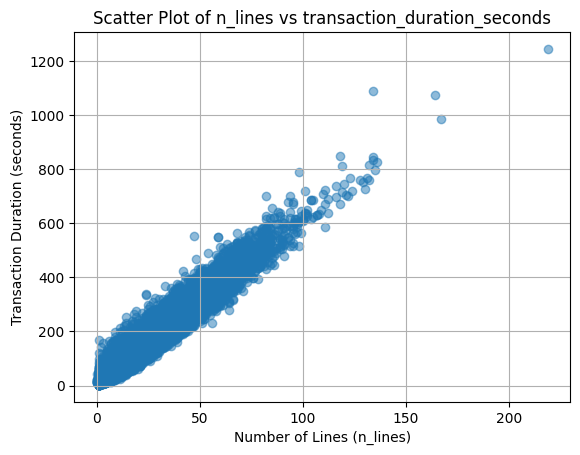

Correlation between n_lines and transaction_duration_seconds: 0.9738335721955312


In [8]:
import matplotlib.pyplot as plt

# Convert the LazyFrame to a pandas DataFrame
df = joined.select("n_lines", "transaction_duration_seconds").collect().to_pandas()

# Scatter plot
plt.scatter(df["n_lines"], df["transaction_duration_seconds"], alpha=0.5)
plt.title("Scatter Plot of n_lines vs transaction_duration_seconds")
plt.xlabel("Number of Lines (n_lines)")
plt.ylabel("Transaction Duration (seconds)")
plt.grid(True)
plt.show()

# and calculate the correlation
correlation = df["n_lines"].corr(df["transaction_duration_seconds"])
print(f"Correlation between n_lines and transaction_duration_seconds: {correlation}")


In [11]:
X = (joined
     .with_columns((pl.col("payment_medium") == "CASH").cast(pl.Int8).alias("is_cash"))
     .select("is_cash", "time_from_last_scan_to_end").collect().to_numpy())

In [14]:
x, y = X[:,0], X[:,1]

In [20]:
from scipy.stats import pointbiserialr

res = pointbiserialr(x, y)

In [21]:
res

SignificanceResult(statistic=np.float64(0.04253736485306966), pvalue=np.float64(2.979033171987177e-60))

In [ ]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(bool_feature, float_feature)

In [116]:
joined.head(2).collect().columns

['damage',
 'cash_desk',
 'total_amount',
 'n_lines',
 'payment_medium',
 'has_feedback',
 'feedback_categorical',
 'feedback_low',
 'feedback_middle',
 'feedback_high',
 'feedback_top',
 'daytime',
 'hour',
 'hour_categorical',
 'day_of_week',
 'month',
 'transaction_duration_seconds',
 'label',
 'store_id',
 'location',
 'urbanization',
 'has_voided',
 'n_voided',
 'n_age_restricted',
 'has_age_restricted',
 'popularity_max',
 'popularity_min',
 'max_product_price',
 'n_sold_by_weight',
 'has_sold_by_weight',
 'has_camera_detected_wrong_product',
 'has_camera_detected_wrong_product_high_certainty',
 'calculated_price_difference',
 'has_positive_price_difference',
 'has_dairy',
 'has_alcohol',
 'has_fruits_vegetables',
 'has_frozen_goods',
 'has_household',
 'has_personal_care',
 'has_bakery',
 'has_fruits_vegetables_pieces',
 'has_beverages',
 'has_long_shelf_life',
 'has_limited_time_offers',
 'has_tobacco',
 'has_convenience',
 'has_snacks',
 'has_missing',
 'mean_time_between_scan

In [ ]:
col = "damage"
(transactions.select(col).sum().collect() - joined.select(col).sum().collect())

damage
f64
7.92


In [92]:
transactions.filter(pl.col("label") != "UNKNOWN").select(pl.len()).collect()

len
u32
148025


In [ ]:
uuid = "01db7c6a-d470-46a7-9b27-52df206ae259" # Tabak voided
uuid = "414390fa-fa04-4141-84fd-c5aa5dd93bff" # Differenz ergbit den Schaden, aber wieso ??? was ist die Masche?
uuid = "c3650ec8-a9cd-4daa-b212-8164658489a4" # Differenz ergbit den Schaden, aber wieso ??? was ist die Masche?

( df.filter(pl.col("label") != "UNKNOWN")
 .filter(pl.col("id") == uuid)
 .with_columns(
  (pl.col("price")*pl.col("pieces_or_weight")).alias("calculated_price"),
  ((pl.col("price")*pl.col("pieces_or_weight")) - pl.col("sales_price")).alias("diff"),
 )
 .select("id", "n_lines", "transaction_start", "category", "damage", "total_amount", "pieces_or_weight", "sales_price", "price", "calculated_price", "diff", "was_voided", "camera_product_similar", "camera_certainty")
 ).collect().to_pandas()

,id,n_lines,transaction_start,category,damage,total_amount,pieces_or_weight,sales_price,price,calculated_price,diff,was_voided,camera_product_similar,camera_certainty
0,c3650ec8-a9cd-4daa-b212-8164658489a4,5,2023-06-13 15:46:24,FRUITS_VEGETABLES_PIECES,17.14,43.53,4.0,1.56,0.39,1.56,0.00,False,True,0.878431
1,c3650ec8-a9cd-4daa-b212-8164658489a4,5,2023-06-13 15:46:24,LONG_SHELF_LIFE,17.14,43.53,42.0,34.99,1.19,49.98,14.99,False,True,1.000000
2,c3650ec8-a9cd-4daa-b212-8164658489a4,5,2023-06-13 15:46:24,LONG_SHELF_LIFE,17.14,43.53,42.0,34.99,1.19,49.98,14.99,True,True,1.000000
3,c3650ec8-a9cd-4daa-b212-8164658489a4,5,2023-06-13 15:46:24,BEVERAGES,17.14,43.53,1.0,0.99,0.99,0.99,0.00,False,True,0.948659
4,c3650ec8-a9cd-4daa-b212-8164658489a4,5,2023-06-13 15:46:24,FRUITS_VEGETABLES_PIECES,17.14,43.53,1.0,0.99,0.99,0.99,0.00,False,True,1.000000
5,c3650ec8-a9cd-4daa-b212-8164658489a4,5,2023-06-13 15:46:24,FRUITS_VEGETABLES_PIECES,17.14,43.53,6.0,5.00,1.19,7.14,2.14,False,True,1.000000


In [39]:
(
df.filter(pl.col("label") != "UNKNOWN")
 .with_columns(
  (pl.col("price")*pl.col("pieces_or_weight")).alias("calculated_price"),
  ((pl.col("price")*pl.col("pieces_or_weight")) - pl.col("sales_price")).alias("diff"),
 ).filter(pl.col("was_voided")).filter(pl.col("damage") == pl.col("calculated_price")).collect()
)

id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label,has_feedback,id__lines,product_id,timestamp,pieces_or_weight,sales_price,was_voided,camera_product_similar,camera_certainty,base_product_id,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted,opening_date,location,state,urbanization,sco_introduction,calculated_price,diff
str,str,i64,datetime[μs],datetime[μs],f64,i64,str,f64,f64,str,i8,i64,str,datetime[μs],f64,f64,bool,bool,f64,str,str,f64,f64,str,str,bool,f64,bool,str,str,str,str,str,f64,f64
"""01db7c6a-d470-46a7-9b27-52df20…","""46e6da32-f4b0-40f3-ada7-fc6ca8…",0,2022-04-01 18:30:12,2022-04-01 18:31:03.449513,20.86,4,"""CREDIT_CARD""",null,110.32,"""FRAUD""",0,2,"""2f65abc4-7ed1-481a-a0ac-5de43a…",2022-04-01 18:30:16.711998,8.0,110.32,true,true,0.30494,"""10640508-7891-4aa4-8fef-64b4a9…","""TOBACCO""",13.79,0.012684,"""2021-10-24""","""2022-11-23""",false,null,true,"""2004-10-05""","""Stuttgart""","""Baden-Württemberg""","""CITIES""","""2022-02-08""",110.32,0.0


In [49]:
1720 / 134942

0.012746216893183738

In [ ]:
def val_count(df, column):
    return (
        df.group_by(column)
        .agg(pl.len().alias("count"))
        .with_columns((pl.col("count") / pl.col("count").sum()).alias("proportion"))
    )

In [51]:
val_count(transactions, "label").collect()

label,count,proportion
str,u32,f64
"""UNKNOWN""",1333758,0.900103
"""NORMAL""",143369,0.096754
"""FRAUD""",4656,0.003142


In [146]:

dfdiff = (
df#.filter(~pl.col("was_voided"))
 .filter(pl.col("label") != "UNKNOWN")
 .with_columns(((pl.col("price")*pl.col("pieces_or_weight")) - pl.col("sales_price")).alias("diff"))
 .group_by("id")
 .agg(
  pl.col("label").first(),
 # pl.col("total_amount").first(),
  pl.col("diff").sum().alias("diff"),
 )
 #.with_columns(abs(pl.col("total_amount") - pl.col("calculated")).alias("diff"))
 .filter(pl.col("diff") > 0.01)
)

val_count(dfdiff, "label").collect()

label,count,proportion
str,u32,f64
"""NORMAL""",8426,0.756441
"""FRAUD""",2713,0.243559


label,count,proportion
str,u32,f64
"""NORMAL""",30323,0.910218
"""FRAUD""",2991,0.089782


In [87]:
val_count(df.filter(pl.col("label") != "UNKNOWN"), "label").collect()

label,count,proportion
str,u32,f64
"""NORMAL""",1528003,0.966132
"""FRAUD""",53565,0.033868


In [65]:
(
df.filter(pl.col("label") == "FRAUD")
.filter(~pl.col("was_voided"))
 .with_columns(
  (pl.col("price")*pl.col("pieces_or_weight")).alias("calculated_price"),
  ((pl.col("price")*pl.col("pieces_or_weight")) - pl.col("sales_price")).alias("diff"),
 ).group_by("id")
 .agg(
  pl.col("diff").sum().alias("diff"),
  pl.col("damage").first().alias("damage"),
 )
 #.filter(abs(pl.col("diff") - pl.col("damage")) < 0.01)
 .filter(pl.col("diff") > 0)

).select(pl.len()).collect()

len
u32
2991


In [ ]:
2991 / 4656

0.6423969072164949

In [61]:
(
df.filter(pl.col("label") == "NORMAL")
.filter(~pl.col("was_voided"))
 .with_columns(
  (pl.col("price")*pl.col("pieces_or_weight")).alias("calculated_price"),
  ((pl.col("price")*pl.col("pieces_or_weight")) - pl.col("sales_price")).alias("diff"),
 ).group_by("id")
 .agg(
  pl.col("diff").sum().alias("diff"),
  pl.col("damage").first().alias("damage"),
 )
 .filter(pl.col("diff") > 0)
).select(pl.len()).collect()

len
u32
30298


In [66]:
30298/143369

0.21132880887779087

In [63]:
1723 / 30298

0.056868440161066736

In [5]:
transactions.select("damage").sum().collect() * 10

damage
f64
351721.2


In [29]:
transactions.filter(pl.col("label") == "FRAUD").select("damage").describe()

statistic,damage
str,f64
"""count""",4656.0
"""null_count""",0.0
"""mean""",7.554149
"""std""",7.38863
"""min""",0.03
"""25%""",3.18
"""50%""",5.24
"""75%""",10.0
"""max""",110.32


In [30]:
a = transactions.filter(pl.col("label") == "FRAUD")
histogram(a, "damage", bin_size = 0.5)

bin,count
f64,u32
0.0,106
0.5,150
1.0,171
1.5,189
2.0,248
…,…
75.0,1
77.5,1
83.5,1


In [19]:
def histogram(
    lf: pl.LazyFrame,
    col: str,
    bin_size: float,
) -> pl.LazyFrame:
    """
    Compute histogram bins manually.

    Parameters
    ----------
    lf : pl.LazyFrame
        The input LazyFrame.
    col : str
        The column to compute the histogram for.
    bin_size : float
        The size of each bin.

    Returns
    -------
    pl.LazyFrame
        A LazyFrame with the histogram bins and counts.
    """
    hist = (
        lf.with_columns(((pl.col(col) / bin_size).floor() * bin_size).alias("bin"))
        .group_by("bin")
        .agg(pl.len().alias("count"))
        .sort("bin")
        .collect()
    )
    return hist


In [1]:
import matplotlib.pyplot as plt

ds = a.select("damage").collect().to_numpy().flatten()

plt.hist(ds, bins=100, edgecolor='black')
plt.title("Damage Distribution")
plt.xlabel("Damage")
plt.ylabel("Frequency")
plt.show()

NameError: name 'a' is not defined

In [15]:
# get the value in column sco_introduction with max length
col = "valid_from"
result = (
    full.with_columns(
        pl.col(col).str.len_chars().alias("length")
    )
    .select("length")
    .unique()
)
result.collect()

length
u32
null
10


In [16]:
full.select("damage").describe()

statistic,damage
str,f64
"""count""",1.581567e6
"""null_count""",1.4212104e7
"""mean""",0.276189
"""std""",2.05161
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",0.0
"""max""",110.32


In [ ]:
full.

transaction_id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label,has_feedback,id__lines,product_id,timestamp,pieces_or_weight,sales_price,was_voided,camera_product_similar,camera_certainty,base_product_id,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted,opening_date,location,state,urbanization,sco_introduction
u32,str,i64,datetime[μs],datetime[μs],f64,i64,str,f64,f64,str,i8,i64,str,datetime[μs],f64,f64,bool,bool,f64,str,str,f64,f64,str,str,bool,f64,bool,str,str,str,str,str
172366,"""3fffea06-686f-42bd-8362-818af8…",3,2022-05-06 20:20:48,2022-05-06 20:22:40.681203,109.68,18,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,11,"""c4904dfb-c1ea-4a86-b5de-685299…",2022-05-06 20:22:01.717101,1.0,3.39,false,true,0.846314,"""ea5ceda3-6153-4d3b-bdaf-6b09a5…","""FROZEN_GOODS""",3.39,0.101526,"""2020-06-22""","""2024-03-05""",false,0.78,false,"""1998-02-17""","""Bonn""","""Nordrhein-Westfalen""","""TOWNS""","""2022-02-15"""
173074,"""3fffea06-686f-42bd-8362-818af8…",2,2022-05-07 20:44:36,2022-05-07 20:49:05.539767,416.54,40,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,6,"""3dfeadf2-dcd1-443f-8a37-03a5de…",2022-05-07 20:45:07.724840,3.0,1.47,false,true,1.0,"""3dfeadf2-dcd1-443f-8a37-03a5de…","""FRUITS_VEGETABLES_PIECES""",0.49,0.18133,"""2012-12-15""",null,false,0.817056,false,"""1998-02-17""","""Bonn""","""Nordrhein-Westfalen""","""TOWNS""","""2022-02-15"""
173074,"""3fffea06-686f-42bd-8362-818af8…",2,2022-05-07 20:44:36,2022-05-07 20:49:05.539767,416.54,40,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,34,"""6e574dc0-ef64-41a3-b5e5-0383c8…",2022-05-07 20:48:27.557576,1.0,1.19,false,true,1.0,"""bb03796a-8ee2-43ef-9126-b99d37…","""CONVENIENCE""",1.19,0.157641,"""2021-08-23""",null,false,0.3,false,"""1998-02-17""","""Bonn""","""Nordrhein-Westfalen""","""TOWNS""","""2022-02-15"""
173074,"""3fffea06-686f-42bd-8362-818af8…",2,2022-05-07 20:44:36,2022-05-07 20:49:05.539767,416.54,40,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,36,"""20a8bef4-30a4-438b-a7d9-ee3343…",2022-05-07 20:48:32.314926,4.0,9.56,false,true,0.842117,"""26470271-a124-413d-8910-dcfa9e…","""DAIRY""",2.39,0.124004,"""2018-10-12""","""2024-04-03""",false,0.84,false,"""1998-02-17""","""Bonn""","""Nordrhein-Westfalen""","""TOWNS""","""2022-02-15"""


In [8]:
full.filter(pl.col("transaction_start").dt.second() == 0).filter(pl.col("transaction_id") == 183441).select(["transaction_id", "transaction_start", "transaction_end", "timestamp"]).head(10).collect()

transaction_id,transaction_start,transaction_end,timestamp
u32,datetime[μs],datetime[μs],datetime[μs]
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:01.127346
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:14.671052
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:05.161295
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:38.566935
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:44.860503
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:26.070043
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:30.774859
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:03.177723
183441,2022-06-09 19:08:00,2022-06-09 19:09:05.788506,2022-06-09 19:08:28.935597


In [20]:
# column with diffrence from transaction_start to timestamp (check if negative)
(
full.with_columns(
    (pl.col("timestamp") - pl.col("transaction_start")).alias("diff")
  ).select(["diff", "timestamp", "transaction_start"])
  .filter(pl.col("transaction_start").dt.second() == 0)
  .sort("diff")
  .head(10)
  .collect()
)

diff,timestamp,transaction_start
duration[μs],datetime[μs],datetime[μs]
521298µs,2023-06-09 17:37:00.521298,2023-06-09 17:37:00
540970µs,2023-01-09 08:38:00.540970,2023-01-09 08:38:00
543234µs,2023-11-20 08:03:00.543234,2023-11-20 08:03:00
556713µs,2023-04-01 14:07:00.556713,2023-04-01 14:07:00
556954µs,2023-01-28 20:04:00.556954,2023-01-28 20:04:00
556983µs,2022-04-30 21:14:00.556983,2022-04-30 21:14:00
559421µs,2022-08-26 16:55:00.559421,2022-08-26 16:55:00
560112µs,2022-07-16 13:32:00.560112,2022-07-16 13:32:00
560185µs,2022-07-23 10:23:00.560185,2022-07-23 10:23:00


In [ ]:
# I have a table with transaction lines (each line belongs to a transaction, a transaction can have multiple lines)
# the transacntion has a start and end time, the lines have a timestamp
# I want to create a column with the difference between the lines timestamp (in a transaction)
full.with_columns(
  §
)

In [21]:
result = (
    full.sort(["transaction_id", "timestamp"])
    .with_columns(
        (pl.col("timestamp") - pl.col("timestamp").shift(1))
        .over("transaction_id")
        .alias("time_diff")
    )
)

In [23]:
result.collect()

transaction_id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label,has_feedback,id__lines,product_id,timestamp,pieces_or_weight,sales_price,was_voided,camera_product_similar,camera_certainty,base_product_id,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted,opening_date,location,state,urbanization,sco_introduction,time_diff
u32,str,i64,datetime[μs],datetime[μs],f64,i64,str,f64,f64,str,i8,i64,str,datetime[μs],f64,f64,bool,bool,f64,str,str,f64,f64,str,str,bool,f64,bool,str,str,str,str,str,duration[μs]
0,"""cd833b6b-0666-42df-b538-6bb1f1…",0,2022-02-02 08:05:48,2022-02-02 08:06:45.332047,26.33,5,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,1,"""ebd042e4-acfd-4d1d-a0e3-8b1e59…",2022-02-02 08:05:59.564694,5.0,4.95,false,false,0.299436,"""56c6f997-c31d-42b2-a970-fb33a1…","""BEVERAGES""",0.99,0.164074,"""2018-09-02""",null,false,0.33,false,"""2000-10-05""","""Köln""","""Nordrhein-Westfalen""","""RURAL""","""2022-02-02""",null
0,"""cd833b6b-0666-42df-b538-6bb1f1…",0,2022-02-02 08:05:48,2022-02-02 08:06:45.332047,26.33,5,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,2,"""3005b329-8338-48a1-8470-512576…",2022-02-02 08:06:08.243643,11.0,10.89,false,false,0.302891,"""a5fcd460-5c15-44ec-90e7-8ba7be…","""FRUITS_VEGETABLES_PIECES""",0.99,0.164074,"""2020-03-04""",null,false,1.151242,false,"""2000-10-05""","""Köln""","""Nordrhein-Westfalen""","""RURAL""","""2022-02-02""",8s 678949µs
0,"""cd833b6b-0666-42df-b538-6bb1f1…",0,2022-02-02 08:05:48,2022-02-02 08:06:45.332047,26.33,5,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,3,"""a5d106aa-0a15-44bd-a18b-ae6a88…",2022-02-02 08:06:23.774764,2.0,2.58,false,false,0.28134,"""a5d106aa-0a15-44bd-a18b-ae6a88…","""FRUITS_VEGETABLES_PIECES""",1.29,0.154519,"""2022-01-25""","""2022-02-17""",false,2.385493,false,"""2000-10-05""","""Köln""","""Nordrhein-Westfalen""","""RURAL""","""2022-02-02""",15s 531121µs
0,"""cd833b6b-0666-42df-b538-6bb1f1…",0,2022-02-02 08:05:48,2022-02-02 08:06:45.332047,26.33,5,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,4,"""cce1867c-506b-4653-96bc-e79539…",2022-02-02 08:06:38.155823,7.0,6.93,false,false,0.267798,"""4464ee13-4d5f-4847-aee9-20295a…","""FRUITS_VEGETABLES_PIECES""",0.99,0.164074,"""2022-01-09""",null,false,1.503716,false,"""2000-10-05""","""Köln""","""Nordrhein-Westfalen""","""RURAL""","""2022-02-02""",14s 381059µs
0,"""cd833b6b-0666-42df-b538-6bb1f1…",0,2022-02-02 08:05:48,2022-02-02 08:06:45.332047,26.33,5,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,5,"""6659b0a4-4fe8-4793-8698-0a8c8c…",2022-02-02 08:06:39.246120,2.0,0.98,false,true,0.230727,"""6659b0a4-4fe8-4793-8698-0a8c8c…","""LONG_SHELF_LIFE""",0.49,0.18133,"""2010-12-30""","""2024-12-26""",false,1.1,false,"""2000-10-05""","""Köln""","""Nordrhein-Westfalen""","""RURAL""","""2022-02-02""",1s 90297µs
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1481780,"""46e6da32-f4b0-40f3-ada7-fc6ca8…",3,2023-12-30 21:56:21,2023-12-30 21:57:30.293376,37.56,6,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,6,"""075fe740-f64f-4951-b7bb-a23db3…",2023-12-30 21:57:20.595982,1.0,0.99,false,true,0.89128,"""64d884c4-7aff-48aa-8f78-437854…","""BEVERAGES""",0.99,0.164074,"""2019-02-11""",null,false,0.75,false,"""2004-10-05""","""Stuttgart""","""Baden-Württemberg""","""CITIES""","""2022-02-08""",4s 334171µs
1481781,"""46e6da32-f4b0-40f3-ada7-fc6ca8…",1,2023-12-30 21:56:28.089721,2023-12-30 21:56:45.725021,1.47,1,"""CREDIT_CARD""",null,null,"""UNKNOWN""",0,1,"""ec0fa75b-4d6a-46ef-8f6e-2d4012…",2023-12-30 21:56:37.541359,3.0,1.47,false,true,0.946447,"""ec0fa75b-4d6a-46ef-8f6e-2d4012…","""FRUITS_VEGETABLES_PIECES""",0.49,0.18133,"""2011-06-12""",null,false,0.89448,false,"""2004-10-05""","""Stuttgart""","""Baden-Württemberg""","""CITIES""","""2022-02-08""",null
1481782,"""46e6da32-f4b0-40f3-ada7-fc6ca8…",1,2023-12-30 21:58:27,2023-12-30 21:58:44.832721,25.08,3,"""CREDIT_CARD""",10.0,null,"""UNKNOWN""",1,1,"""455dedac-2c6d-4eb5-913a-6

In [19]:
# column with diffrence from transaction_start to timestamp (check if negative)
(
full.with_columns(
    (pl.col("transaction_end") - pl.col("transaction_start")).alias("diff")
  ).select(["diff", "transaction_start", "transaction_end"])
  .sort("diff")
  #  .head(10)
  #  .collect()
).describe()

statistic,diff,transaction_start,transaction_end
str,str,str,str
"""count""","""15793671""","""15793671""","""15793671"""
"""null_count""","""0""","""0""","""0"""
"""mean""","""0:02:32.067698""","""2023-01-25 03:21:36.028256""","""2023-01-25 03:24:08.095955"""
"""std""",null,null,null
"""min""","""0:00:03.657174""","""2022-02-02 08:05:48""","""2022-02-02 08:06:45.332047"""
"""25%""","""0:01:09.746131""","""2022-08-05 11:24:15""","""2022-08-05 11:25:49.326406"""
"""50%""","""0:02:04.377096""","""2023-01-25 16:35:45""","""2023-01-25 16:37:07.859882"""
"""75%""","""0:03:24.107700""","""2023-07-15 14:38:09""","""2023-07-15 14:40:36.329357"""
"""max""","""0:20:44.869451""","""2023-12-30 21:59:51""","""2023-12-30 22:03:24.878892"""


In [18]:
# column with diffrence from transaction_start to timestamp (check if negative)
(
full.with_columns(
    (pl.col("transaction_end") - pl.col("timestamp")).alias("diff")
  ).select(["diff", "timestamp", "transaction_end"])
  .filter(pl.col("transaction_end").dt.second() == 0)
  .sort("diff", descending=True)
  .head(10)
  .collect()
)

diff,timestamp,transaction_end
duration[μs],datetime[μs],datetime[μs]
12m 2s 106895µs,2023-04-25 18:38:58.812098,2023-04-25 18:51:00.918993
11m 57s 582465µs,2023-04-25 18:39:03.336528,2023-04-25 18:51:00.918993
11m 55s 817886µs,2023-04-25 18:39:05.101107,2023-04-25 18:51:00.918993
11m 55s 809119µs,2023-03-02 18:39:04.987128,2023-03-02 18:51:00.796247
11m 54s 840261µs,2023-03-02 18:39:05.955986,2023-03-02 18:51:00.796247
11m 47s 979381µs,2023-03-02 18:39:12.816866,2023-03-02 18:51:00.796247
11m 45s 898935µs,2023-04-25 18:39:15.020058,2023-04-25 18:51:00.918993
11m 37s 133600µs,2023-03-02 18:39:23.662647,2023-03-02 18:51:00.796247
11m 34s 708146µs,2023-03-02 18:39:26.088101,2023-03-02 18:51:00.796247


prüfe, dass jedes Produkt auch eine base_product_id hat

In [5]:
products.select(["id", "base_product_id"]).describe().filter(pl.col("statistic").is_in(["count", "null_count"]))

statistic,id,base_product_id
str,str,str
"""count""","""8120""","""8120"""
"""null_count""","""0""","""0"""


In [6]:
# number of lines in the lines table
n_rows_lines = lines.select(pl.len()).collect().item()
print(f"{'Number of lines in lines:':<40} {n_rows_lines}")

# join lines and products
lines_products = lines.join(
    products,
    left_on="product_id",
    right_on="id",
    how="inner",
    suffix="_product",
)

# number of lines in the lines_products table
n_rows_lines_products = lines_products.select(pl.len()).collect().item()
print(f"{'Number of rows in joined lines_products:':<40} {n_rows_lines_products}")

# difference in number of rows
missing_rows = n_rows_lines - n_rows_lines_products
print(f"{'Difference in number of rows:':<40} {missing_rows}")


Number of lines in lines:                15793671
Number of rows in joined lines_products: 15793479
Difference in number of rows:            192


Grund der Differenz: Lines mit fehlenden product_id

In [7]:
lines.select("product_id").describe().filter(pl.col("statistic").is_in(["count", "null_count"]))

statistic,product_id
str,str
"""count""","""15793479"""
"""null_count""","""192"""


### Join transactions und lines und prüfe die Zeilen mit fehlender product_id

- Lines mit fehlender product_id haben in der Spalte "was_voided" den Wert true
- Kamera hat die Produkte nie erkannt (mit hoher Sicherheit)
- zeitlich sind die Transaktionen über die zwei Jahre verteilt

In [8]:
joined = (
    transactions.join(
        lines,
        left_on="id",
        right_on="transaction_id",
        suffix="__lines",
        how="left",
    )
    .filter(pl.col("id__lines").is_not_null())
    .filter(pl.col("product_id").is_null())
    .select(
        [
            pl.col("id").alias("transaction_id"),
            "n_lines",
            "id__lines",
            "product_id",
            "transaction_start",
            "was_voided",
            "camera_product_similar",
            "camera_certainty",
            "label",
        ],
    )
)

joined.describe()

statistic,transaction_id,n_lines,id__lines,product_id,transaction_start,was_voided,camera_product_similar,camera_certainty,label
str,str,f64,f64,str,str,f64,f64,f64,str
"""count""","""192""",192.0,192.0,"""0""","""192""",192.0,192.0,192.0,"""192"""
"""null_count""","""0""",0.0,0.0,"""192""","""0""",0.0,0.0,0.0,"""0"""
"""mean""",null,12.208333,5.020833,null,"""2022-10-09 15:48:00.780292""",1.0,0.0,0.961604,null
"""std""",null,12.643246,4.940439,null,null,null,null,0.055233,null
"""min""","""013253c0-db47-424e-8e31-eb84cc…",0.0,1.0,null,"""2022-02-02 10:08:39""",1.0,0.0,0.718538,"""FRAUD"""
"""25%""",null,3.0,2.0,null,"""2022-04-16 20:13:27""",null,null,0.93736,null
"""50%""",null,7.0,4.0,null,"""2022-08-05 19:27:57""",null,null,0.999941,null
"""75%""",null,16.0,6.0,null,"""2023-04-01 17:11:48""",null,null,1.0,null
"""max""","""fe186f14-5161-472e-958e-456b99…",65.0,41.0,null,"""2023-12-29 20:25:42""",1.0,0.0,1.0,"""UNKNOWN"""


In [9]:
n_missing_product_id = joined.select(pl.len()).collect().item()
print(
    f"Number of rows without product_id in joined transactions and lines: {n_missing_product_id}"
)

n_unique_transactions = (
    joined.select("transaction_id").unique().select(pl.len()).collect().item()
)
print(
    f"Number of unique transactions without product_id in joined transactions and lines: {n_unique_transactions}"
)

Number of rows without product_id in joined transactions and lines: 192
Number of unique transactions without product_id in joined transactions and lines: 182


In [11]:
vc = (
    joined.group_by("transaction_id", "n_lines", "label")
    .agg(pl.len().alias("n_missing_product_ids"))
    .sort("n_missing_product_ids")
    .collect()
)
print("Number of missing product_ids per transaction:")
vc


Number of missing product_ids per transaction:


transaction_id,n_lines,label,n_missing_product_ids
str,i64,str,u32
"""2298bdf8-c903-4ef6-b4f8-8f576e…",12,"""FRAUD""",1
"""3dd5b29c-064c-4fd1-af04-ef5a5b…",3,"""UNKNOWN""",1
"""fdfe7ebc-c991-4113-834d-74d645…",5,"""UNKNOWN""",1
"""ea492d1d-ea02-4f02-8642-170fb7…",6,"""UNKNOWN""",1
"""db19323a-cefa-4beb-9eb1-603011…",7,"""UNKNOWN""",1
…,…,…,…
"""f8c5318e-cf0f-4ad8-b7a5-60d3c1…",18,"""UNKNOWN""",2
"""2a3cb6e4-1b55-48ab-b0eb-a9d5cc…",13,"""UNKNOWN""",2
"""bd8b1528-321f-4851-96c7-229502…",14,"""UNKNOWN""",2


In [19]:
vc.filter(pl.col("label") == "FRAUD")

transaction_id,label,n_missing_product_ids
str,str,u32
"""e83ea717-a830-4b61-a050-272ae6…","""FRAUD""",1
"""6696b83d-7553-4725-8831-6f1a24…","""FRAUD""",1
"""1408e4f3-16cd-4125-920d-55cb97…","""FRAUD""",1
"""ec46aae0-b102-47d0-a4e6-019209…","""FRAUD""",1
"""83fc9067-6917-4f65-9f0a-766955…","""FRAUD""",1
…,…,…
"""09614115-d033-4f2e-80b4-fc8460…","""FRAUD""",1
"""968cd3e4-4799-4e80-9741-05b934…","""FRAUD""",1
"""2298bdf8-c903-4ef6-b4f8-8f576e…","""FRAUD""",1


In 17 Fällen gehört die Zeile zu einem Betrugsfall. 

In [20]:
vc = joined.group_by("label").agg(pl.len().alias("n_missing_product_ids")).collect()
print("Number of missing product_ids per label:")
vc

Number of missing product_ids per label:


label,n_missing_product_ids
str,u32
"""FRAUD""",17
"""UNKNOWN""",175
